<a href="https://colab.research.google.com/github/rathika0706/Delhivery_casestudy_Feature_Engineering/blob/main/Delhivery_case_study_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Importing libraries






In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy





*   Reading the data and analyzing basic characteristics of dataset





In [94]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

In [95]:
df.shape

(144867, 24)

In [96]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000




*   Removing null values



In [97]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [98]:
df.dropna(inplace=True)
df.reset_index(drop=True)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144312,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144313,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144314,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            



*   Converting the columns into appropriate data types and dropping unknown fields.



In [100]:
datetime_columns= ["trip_creation_time","od_start_time","od_end_time"]
for i in datetime_columns:
  df[i]=pd.to_datetime(df[i])

In [101]:
df["data"]=df["data"].astype("category")
df["route_type"]=df["route_type"].astype("category")

In [102]:
unknown_fields=["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"]
df.drop(columns=unknown_fields,inplace=True) #dropping unknown fields

In [103]:
df.nunique() #unique values for each field

data                                   2
trip_creation_time                 14787
route_schedule_uuid                 1497
route_type                             2
trip_uuid                          14787
source_center                       1496
source_name                         1496
destination_center                  1466
destination_name                    1466
od_start_time                      26223
od_end_time                        26223
start_scan_to_end_scan              1914
actual_distance_to_destination    143965
actual_time                         3182
osrm_time                           1531
osrm_distance                     137544
segment_actual_time                  746
segment_osrm_time                    214
segment_osrm_distance             113497
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n



*   Basic description of the dataset



In [105]:
df.describe(include="object")

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144316,144316,144316,144316,144316,144316
unique,1497,14787,1496,1496,1466,1466
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23267,23267,15192,15192


In [106]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,NaN,NaN,NaN,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367




 **Merging of rows and aggregation of fields**


*   Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?





In [107]:
grouping_df=["trip_uuid","source_center","destination_center"]
df1=df.groupby(by=grouping_df, as_index=False).agg({"data":"first",
                                                "trip_creation_time": "first",
                                                "route_type":"first",
                                                "source_name":"first",
                                                "destination_name":"last",
                                                "od_start_time":"first",
                                                "od_end_time":"first",
                                                "start_scan_to_end_scan":"first",
                                                "actual_distance_to_destination":"last",
                                                "actual_time":"last",
                                                "osrm_time":"last",
                                                "osrm_distance":"last",
                                                "segment_actual_time":"sum",
                                                "segment_osrm_time":"sum",
                                                "segment_osrm_distance":"sum"})
df1


,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303




*    Calculating the time taken between od_start_time and od_end_time and keep it as a feature




In [108]:
df1["od_total_time"]=df1["od_end_time"]-df1["od_start_time"]
df1.drop(columns=["od_start_time","od_end_time"],inplace=True)
df1["od_total_time"]=df1["od_total_time"].apply(lambda x: round(x.total_seconds()/60.0,2))
df1.head(2)

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51


In [109]:
df2=df1.groupby(by="trip_uuid",as_index=False).agg({"data":"first",
                                                "trip_creation_time": "first",
                                                "route_type":"first",
                                                "source_name":"first",
                                                "destination_name":"last",
                                                "od_total_time":"sum",
                                                "start_scan_to_end_scan":"sum",
                                                "actual_distance_to_destination":"sum",
                                                "actual_time":"sum",
                                                "osrm_time":"sum",
                                                "osrm_distance":"sum",
                                                "segment_actual_time":"sum",
                                                "segment_osrm_time":"sum",
                                                "segment_osrm_distance":"sum"})
df2.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919




*   Building some features to prepare the data for actual analysis.


1.   Source Name: Split and extract features out of destination. City-place-code (State)





In [110]:
def location_name_to_state(x):
  l=x.split("(")
  if len(l)==1:
    return l[0]
  else:
    return l[1].replace(")","")

In [111]:
def location_name_to_city(x):
  if'location'in x:
    return "unknown city"
  else:
    l=x.split()[0].split("_")
    if "CCU" in x:
      return "Kolkata"
    elif "MAA" in x.upper():
      return "Chennai"
    elif ("HBR" in x.upper()) or ("BLR" in x.upper()):
      return "Bengaluru"
    elif "FBD" in x.upper():
      return "Faridabad"
    elif "BOM" in x.upper():
      return "Mumbai"
    elif "DEL" in x.upper():
      return "Delhi"
    elif "OK" in x.upper():
      return "Delhi"
    elif "GZB" in x.upper():
      return "Ghaziabad"
    elif "GGN" in x.upper():
      return "Gurgaon"
    elif "AMD" in x.upper():
      return "Ahmedabad"
    elif "CJB" in x.upper():
      return "Coimbatore"
    elif "HYD" in x.upper():
      return "hyderabad"
    return l[0]

In [112]:
def location_name_to_place(x):
    if 'location' in x:
       return x
    elif "HBR" in x:
      return "HBR Layout PC"
    else:
      l=x.split()[0].split("_", 1)
      if len(l)==1:
        return "unknown place"
      else:
        return l[1]


In [113]:
df2["source_state"]=df2["source_name"].apply(location_name_to_state)
df2["source_city"]=df2["source_name"].apply(location_name_to_city)
df2["source_place"]=df2["source_name"].apply(location_name_to_place)
df2.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,Uttar Pradesh,Kanpur,Central_H_6
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,Karnataka,Doddablpur,ChikaDPP_D
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,Haryana,Gurgaon,Bilaspur_HB
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,Maharashtra,Mumbai,unknown place
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,Karnataka,Bellary,Dc





2.   Destination Name: Split and extract features out of destination. City-place-code (State)



In [114]:
df2["destination_state"]=df2["destination_name"].apply(location_name_to_state)
df2["destination_city"]=df2["destination_name"].apply(location_name_to_city)
df2["destination_place"]=df2["destination_name"].apply(location_name_to_place)
df2.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,...,991.3523,1548.0,1008.0,1320.4733,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,...,85.1110,141.0,65.0,84.1894,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,...,2354.0665,3308.0,1941.0,2545.2678,Haryana,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,...,19.6800,59.0,16.0,19.8766,Maharashtra,Mumbai,unknown place,Maharashtra,Mumbai,MiraRd_IP
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,...,146.7918,340.0,115.0,146.7919,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D




3.   Trip_creation_time: Extract features like month, year and day etc.,



In [115]:
df2["trip_creation_date"]=pd.to_datetime(df2["trip_creation_time"].dt.date)
df2["trip_creation_day"]=df2["trip_creation_time"].dt.day
df2["trip_creation_month"]=df2["trip_creation_time"].dt.month
df2["trip_creation_year"]=df2["trip_creation_time"].dt.year
df2["trip_creation_hour"]=df2["trip_creation_time"].dt.hour
df2.head()


,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,source_city,source_place,destination_state,destination_city,destination_place,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,...,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12,12,9,2018,0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,...,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12,9,2018,0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,...,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12,12,9,2018,0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,...,Mumbai,unknown place,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12,9,2018,0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,...,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12,12,9,2018,0


In [116]:
df2.shape

(14787, 26)

In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_type                      14787 non-null  category      
 4   source_name                     14787 non-null  object        
 5   destination_name                14787 non-null  object        
 6   od_total_time                   14787 non-null  float64       
 7   start_scan_to_end_scan          14787 non-null  float64       
 8   actual_distance_to_destination  14787 non-null  float64       
 9   actual_time                     14787 non-null  float64       
 10  osrm_time                       14787 non-null  float64       
 11  os

In [118]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14787,2018-09-22 12:26:28.269885696,2018-09-12 00:00:16.535741,2018-09-17 02:38:18.128431872,2018-09-22 03:39:19.609193984,2018-09-27 19:23:14.074359552,2018-10-03 23:59:42.701692,NaN
od_total_time,14787.0,530.313468,23.46,149.695,279.71,633.535,7898.55,658.415416
start_scan_to_end_scan,14787.0,529.429025,23.0,149.0,279.0,632.0,7898.0,658.254936
actual_distance_to_destination,14787.0,164.090196,9.002461,22.777099,48.287894,163.591258,2186.531787,305.502982
actual_time,14787.0,356.306012,9.0,67.0,148.0,367.0,6265.0,561.517936
osrm_time,14787.0,160.990938,6.0,29.0,60.0,168.0,2032.0,271.459495
osrm_distance,14787.0,203.887411,9.0729,30.7569,65.3028,206.6442,2840.081,370.565564
segment_actual_time,14787.0,353.059174,9.0,66.0,147.0,364.0,6230.0,556.365911
segment_osrm_time,14787.0,180.511598,6.0,30.0,65.0,184.0,2564.0,314.679279
segment_osrm_distance,14787.0,222.705466,9.0729,32.57885,69.7842,216.5606,3523.6324,416.846279


In [119]:
df2.describe(include="object").T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14787,29,Maharashtra,2714
source_city,14787,687,Mumbai,1442
source_place,14787,755,Bilaspur_HB,1052
destination_state,14787,31,Maharashtra,2561
destination_city,14787,805,Mumbai,1548
destination_place,14787,843,Bilaspur_HB,821


**In-depth analysis**


1.   How many trips are created on hourly basis?



In [120]:
df2_hour=df2.groupby(by="trip_creation_hour")["trip_uuid"].count().to_frame().reset_index()
df2_hour.head()

,trip_creation_hour,trip_uuid
0,0,991
1,1,748
2,2,702
3,3,651
4,4,635


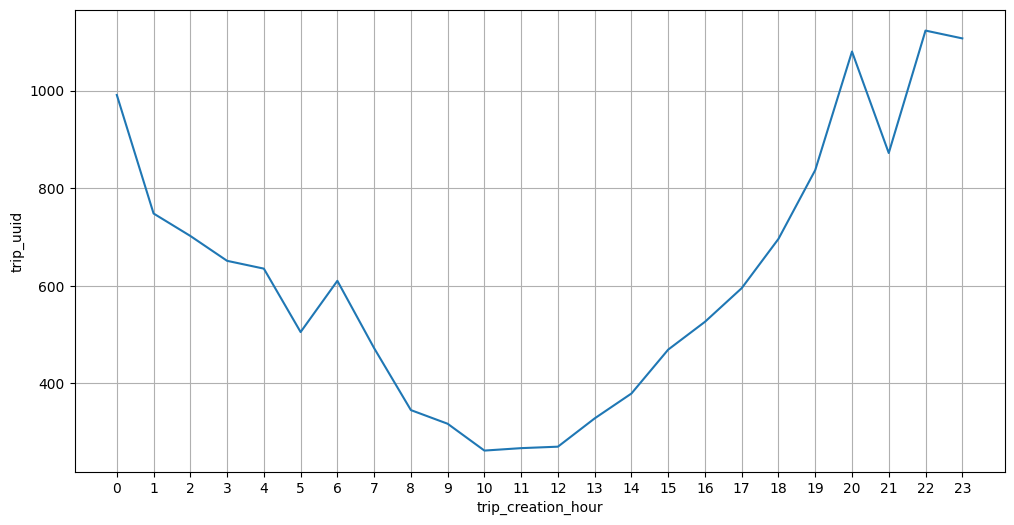

In [121]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df2_hour,x=df2_hour["trip_creation_hour"], y=df2_hour["trip_uuid"] )
plt.xticks(np.arange(0,24))
plt.grid("both")
plt.show()

It can be inferred from the above plot,  that the number of trips started increasing after the noon, becomes maximum at 10 PM and then starts decreasing.



2.   How many trips were created in different days of month?



In [122]:
df2_day=df2.groupby(by="trip_creation_day")["trip_uuid"].count().to_frame().reset_index()
df2_day.head()

,trip_creation_day,trip_uuid
0,1,600
1,2,549
2,3,627
3,12,747
4,13,750


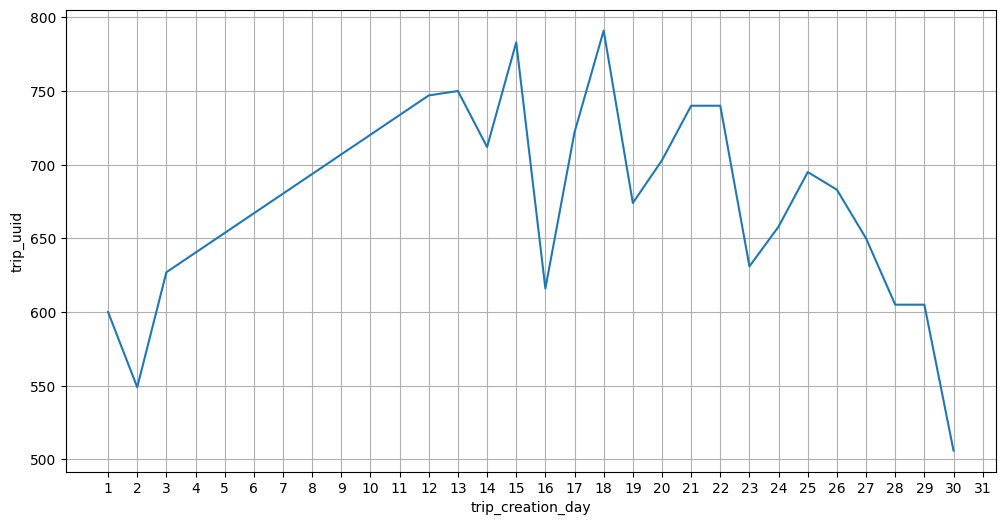

In [123]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df2_day,x=df2_day["trip_creation_day"], y=df2_day["trip_uuid"] )
plt.xticks(np.arange(1,32))
plt.grid("both")
plt.show()

We observe from above plot  that most of the trips are created in the mid of the month, meaning thereby, customers usually make more orders in the mid of the month.



*   Distribution of number of trips created from different states



In [124]:
df2_source_state=df2.groupby(by="source_state")["trip_uuid"].count().to_frame().reset_index()
df2_source_state=df2_source_state.sort_values(by="trip_uuid",ascending=False)
df2_source_state.head()

,source_state,trip_uuid
17,Maharashtra,2714
14,Karnataka,2143
10,Haryana,1823
24,Tamil Nadu,1039
25,Telangana,784


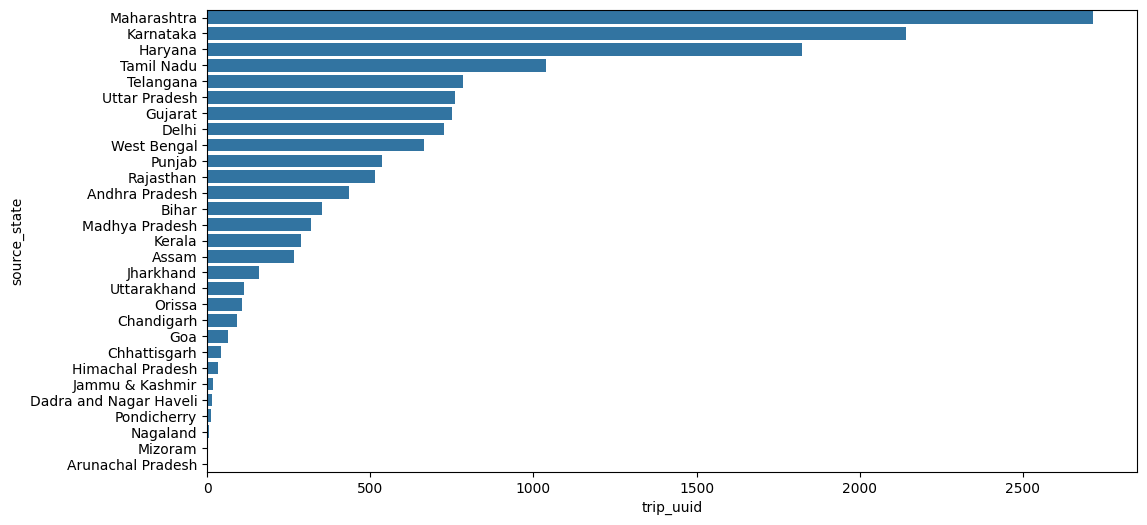

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(data=df2_source_state,y=df2_source_state["source_state"], x=df2_source_state["trip_uuid"] )
plt.show()

It can be seen in the above plot that maximum trips originated from Maharashtra, followed by Karnataka and Haryana. That means that the seller base is strong in these states



*   Distribution of number of trips of top 20 cities


In [126]:
df2_source_city=df2.groupby(by="source_city")["trip_uuid"].count().to_frame().reset_index()
df2_source_city=df2_source_city.sort_values(by="trip_uuid",ascending=False)[:20]
df2_source_city.head()

,source_city,trip_uuid
435,Mumbai,1442
235,Gurgaon,1154
167,Delhi,880
77,Bengaluru,726
98,Bhiwandi,697


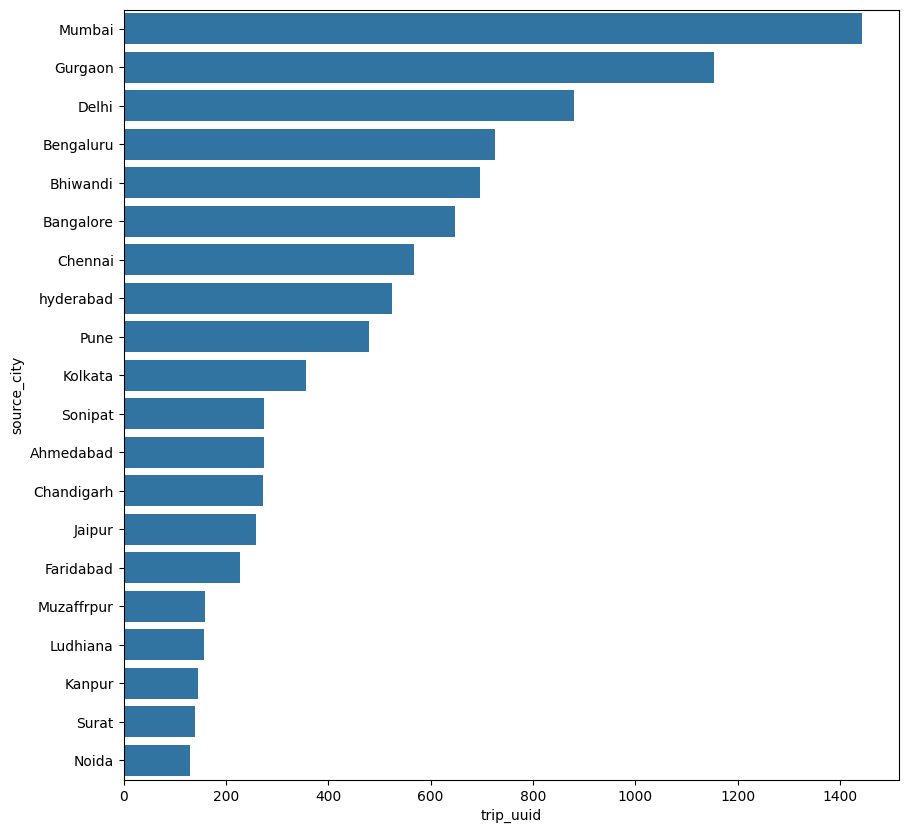

In [127]:
plt.figure(figsize=(10,10))
sns.barplot(data=df2_source_city,y=df2_source_city["source_city"], x=df2_source_city["trip_uuid"] )
plt.show()

**Hypothesis** **testing**


1. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.



*   Null Hypothesis ( H0 ):od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

*   Alternate Hypothesis ( HA ): od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.


  2.Checking for basic assumpitons for the hypothesis:



*  Distribution check using
QQ Plot

*  Homogeneity of Variances using
Lavene's test


3.   Define Test statistics; Distribution of T under H0.--If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the nonparametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


4.   Compute the p-value and set alpha value be to 0.05
5.   If p value< alpha: Reject Ho, p value> alpha: Accept Ho




















QQ plot: To check normality

[]

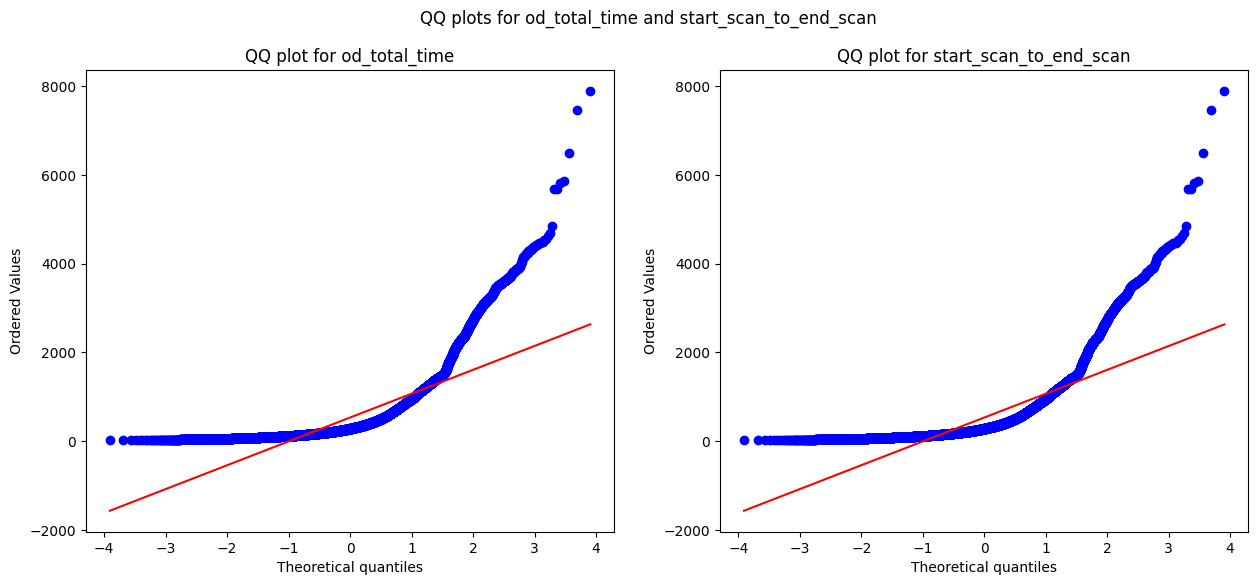

In [128]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(df2['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

We observe that total time and start scan to end scan are not normally distributed. Hence, we perform Shapiro-Wilk test of normality


*   Ho: Sample follows normal distribution
*   Ha: Sample does not follow normal distribution




In [129]:
test_stat, p_value = spy.shapiro(df2['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [130]:
test_stat, p_value = spy.shapiro(df2['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution




* Homogeneity of Variances using Levene's test


*   Ho: Sample has homogenous varriance
*   Ha: Sample does not have homogenous varriance





In [131]:
test_stat, p_value = spy.levene(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9671810468715469
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [132]:
test_stat, p_value = spy.mannwhitneyu(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.780940379505003


Since p-value > alpha therfore it can be concluded that the mean of od_total_time and start_scan_to_end_scan are similar.



2.   Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)





QQ plot for normality distribution:

[]

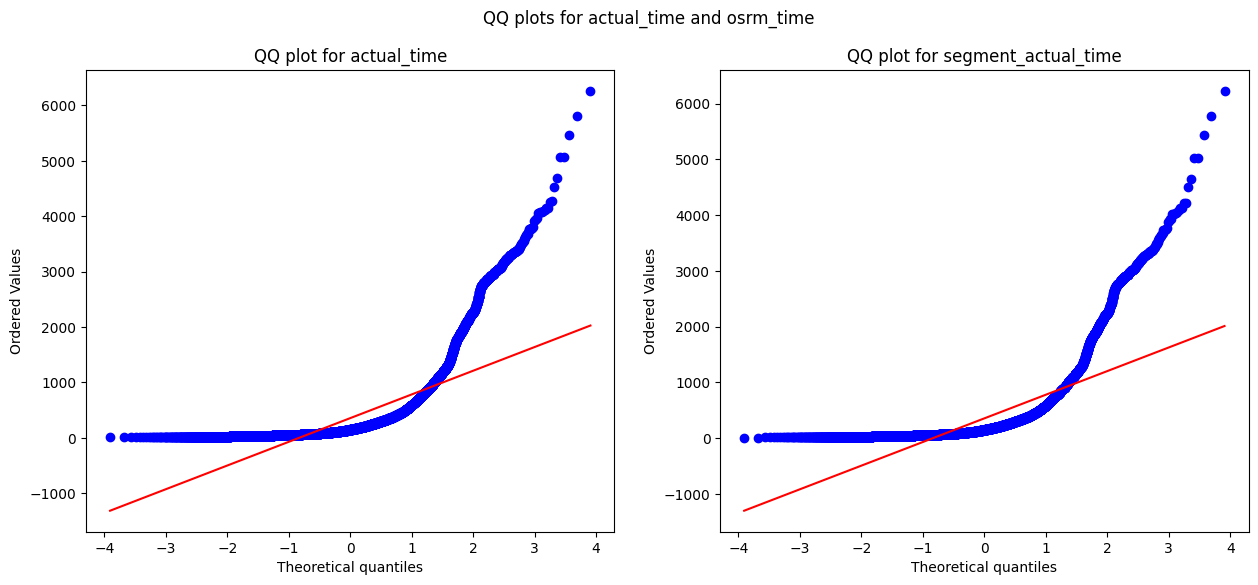

In [133]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

Shapiro-Wilk test of Normality

In [134]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [135]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Leven's test for varraince

In [136]:
test_stat, p_value = spy.levene(df2['actual_time'], df2["segment_actual_time"])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.6962681452003544
The samples have Homogenous Variance 


In [137]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.41578601931625214
The samples are similar 


We conclude that,Since p-value > alpha therfore it can be concluded that the mean of actual time and segment_actual_time are similar.



3.   Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)




QQ plot for Normality

[]

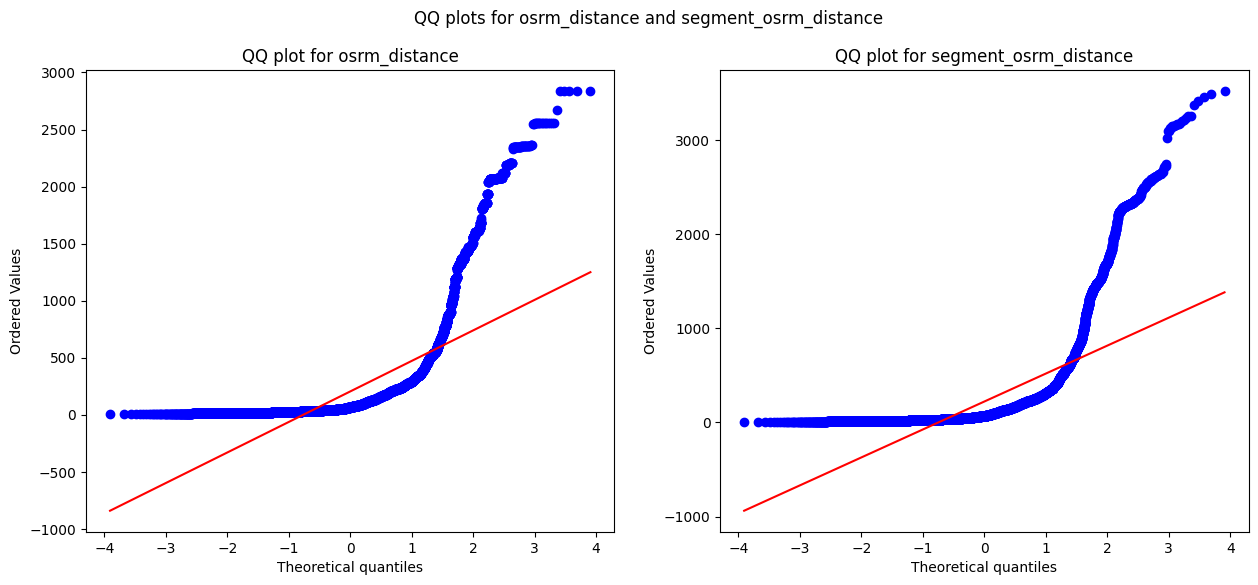

In [139]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

Shapiro-Wilk test

In [140]:
test_stat, p_value = spy.shapiro(df2['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [141]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Levene's test for varriance

In [142]:
test_stat, p_value = spy.levene(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.00022171213513990103
The samples do not have Homogenous Variance


Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [143]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 1.0001087659092072e-06
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are not similar.

4.Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

QQ plot for normality

[]

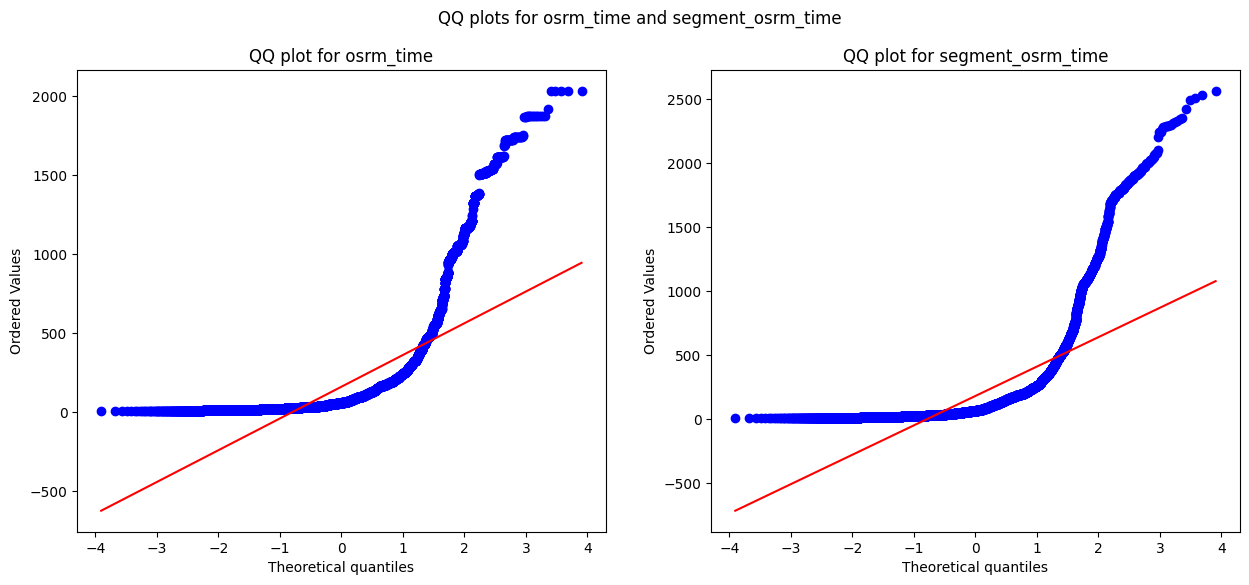

In [144]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

Shapiro-Wilk test for normality

In [145]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [146]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


Levene's test

In [147]:
test_stat, p_value = spy.levene(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 9.250556006347759e-08
The samples do not have Homogenous Variance


Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [148]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 2.4893531591323577e-08
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [149]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df2[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400


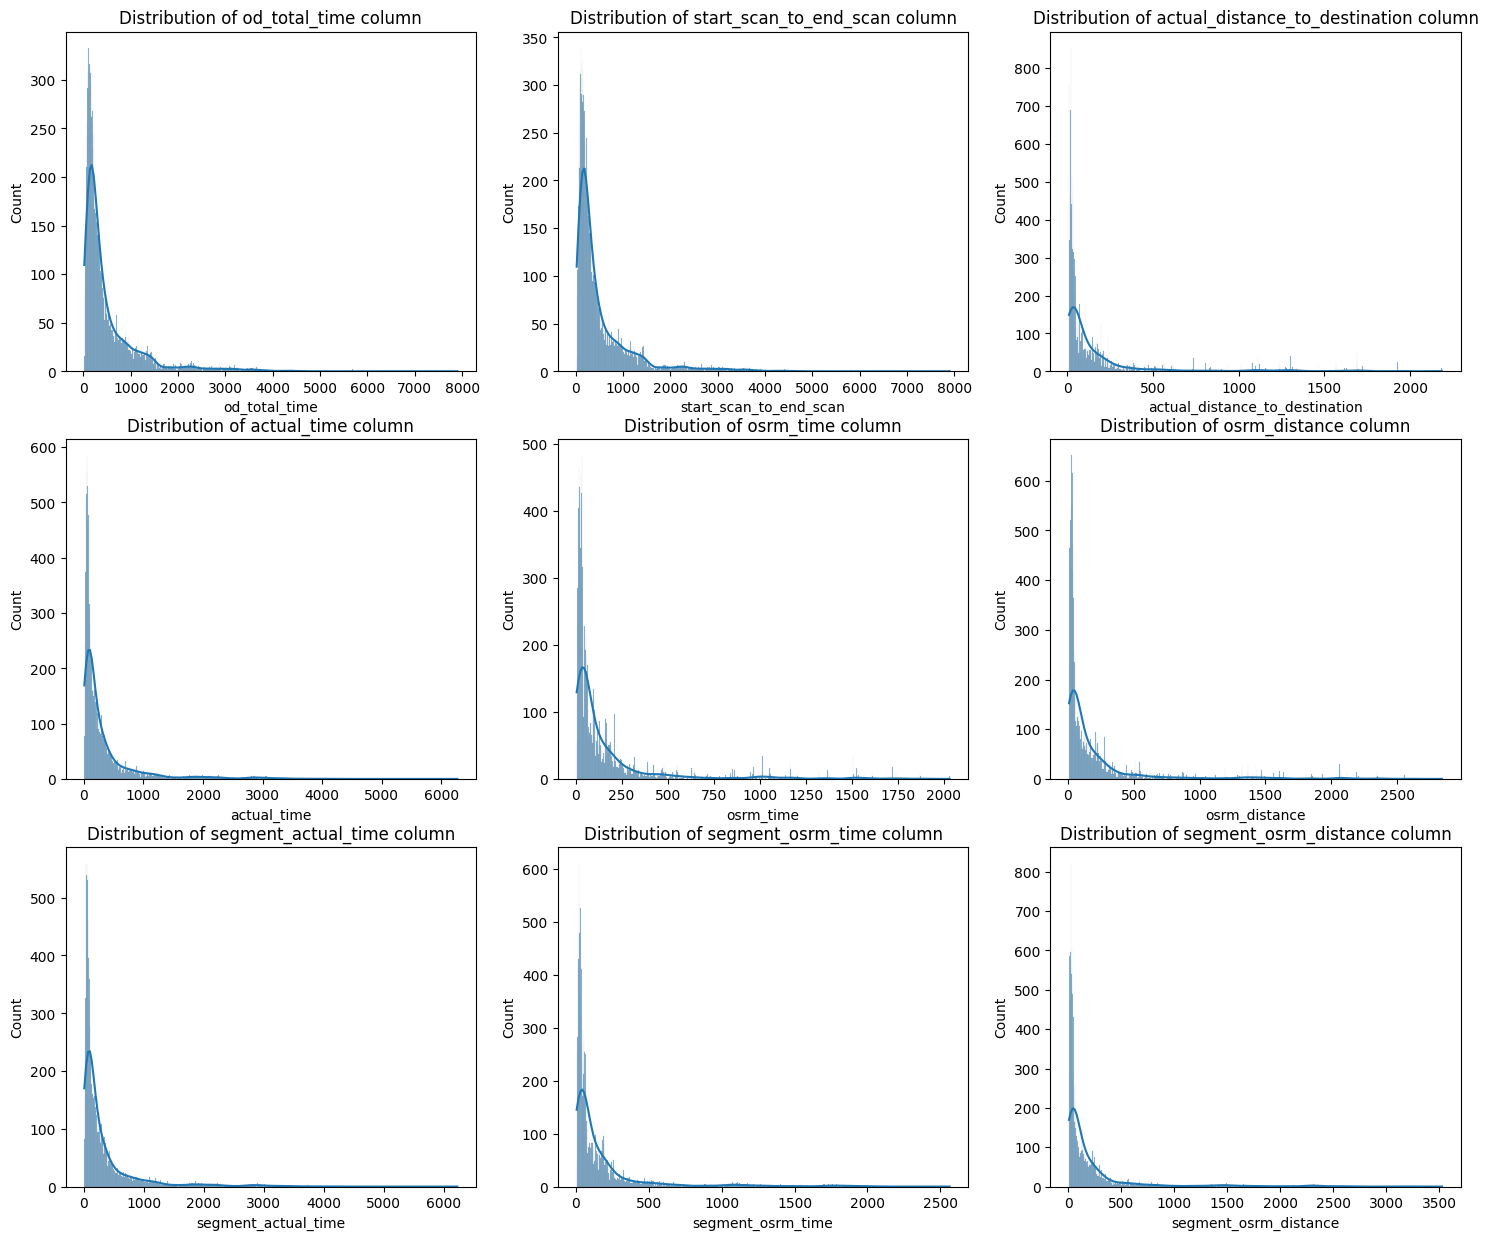

In [152]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df2[numerical_columns[i]], bins = 1000, kde = True)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

It can be inferred from the above plots that data in all the numerical columns are right skewed.

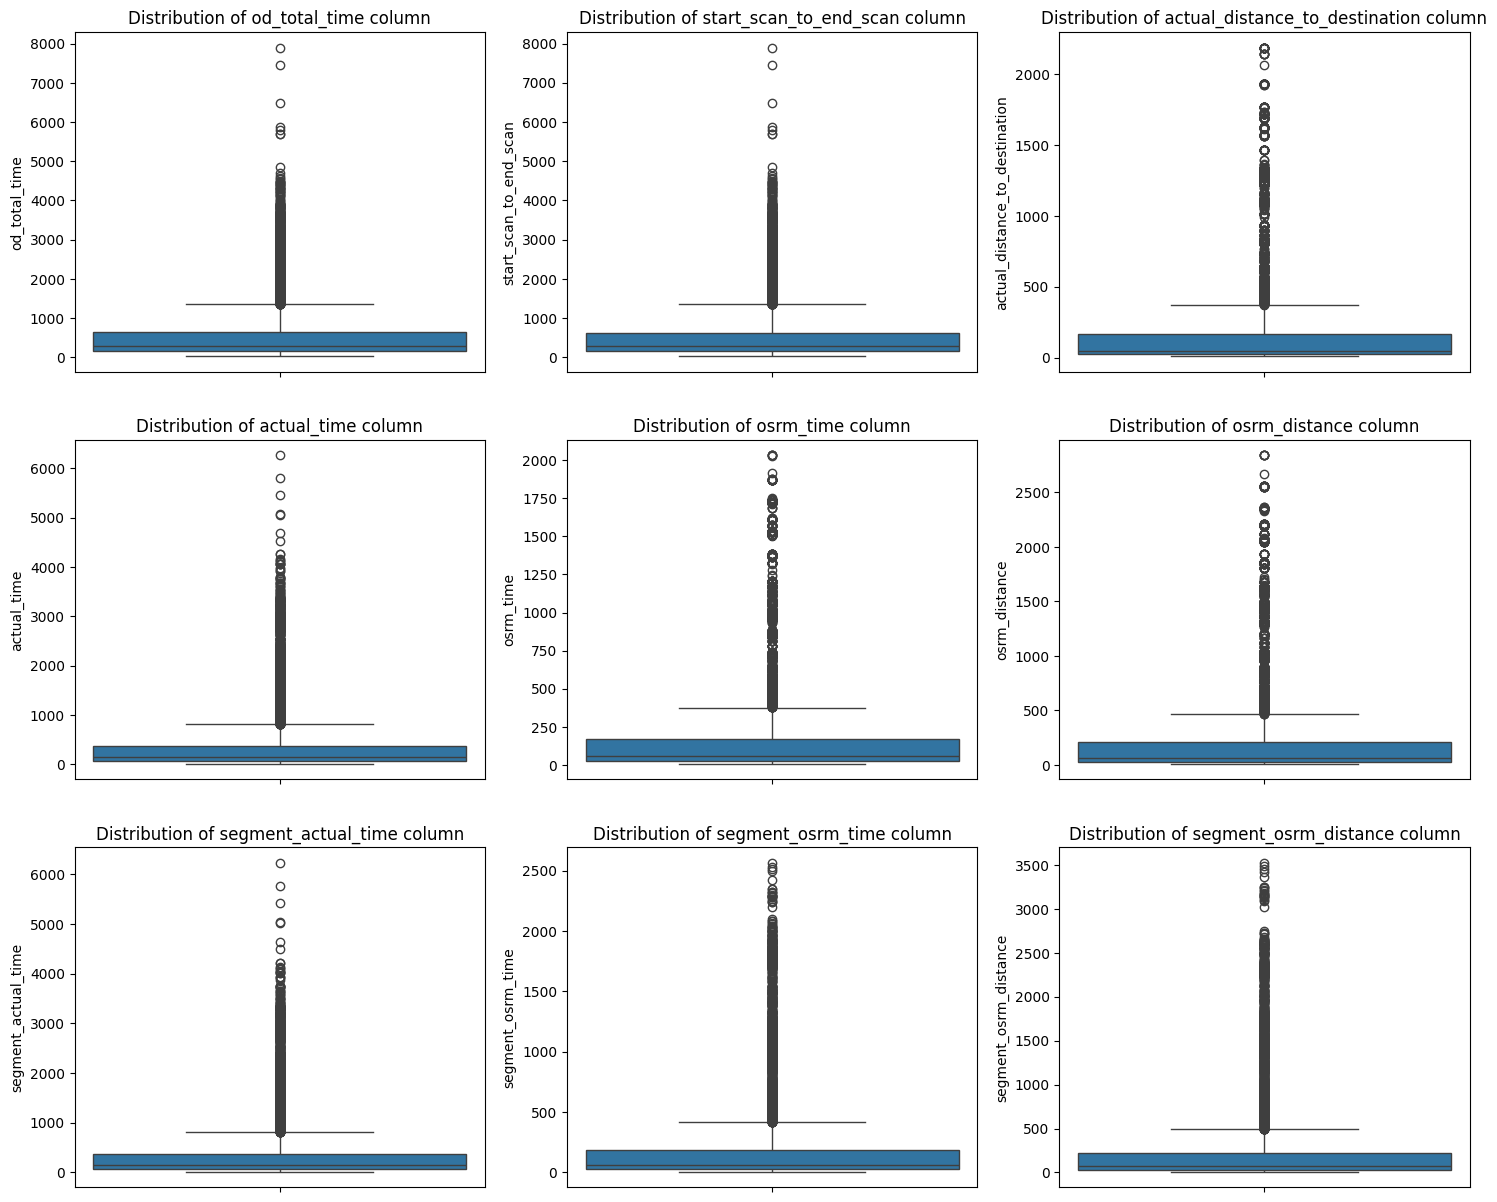

In [153]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df2[numerical_columns[i]])
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

It can be clearly seen in the above plots that there are outliers in all the numerical columns that need to be treated.

In [154]:
for i in numerical_columns:
    Q1 = np.quantile(df2[i], 0.25)
    Q3 = np.quantile(df2[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df2.loc[(df2[i] < LB) | (df2[i] > UB)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Column : od_total_time
Q1 : 149.695
Q3 : 633.535
IQR : 483.84
LB : -576.065
UB : 1359.295
Number of outliers : 1275
----------------------------------
Column : start_scan_to_end_scan
Q1 : 149.0
Q3 : 632.0
IQR : 483.0
LB : -575.5
UB : 1356.5
Number of outliers : 1282
----------------------------------
Column : actual_distance_to_destination
Q1 : 22.777098943155323
Q3 : 163.5912581579725
IQR : 140.81415921481718
LB : -188.44413987907043
UB : 374.81249698019826
Number of outliers : 1452
----------------------------------
Column : actual_time
Q1 : 67.0
Q3 : 367.0
IQR : 300.0
LB : -383.0
UB : 817.0
Number of outliers : 1646
----------------------------------
Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 1506
----------------------------------
Column : osrm_distance
Q1 : 30.7569
Q3 : 206.6442
IQR : 175.8873
LB : -233.07405000000003
UB : 470.47515000000004
Number of outliers : 1522
----------------------------------
Column : segment_actual_tim

The outliers present in our sample data can be the true outliers. It's best to remove outliers only when there is a sound reason for doing so. Some outliers represent natural variations in the population, and they should be left as is in the dataset.

Do one-hot encoding of categorical variables (like route_type)

In [155]:
df2['route_type'].value_counts()

route_type
Carting    8906
FTL        5881
Name: count, dtype: int64

Performing one-hot label encoding on route type column

In [156]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df2["route_type"]=label_encoder.fit_transform(df2["route_type"])

In [ ]:
df2['route_type'].value_counts() #after one-hot encoding

In [157]:
df2['data'].value_counts()

data
training    10645
test         4142
Name: count, dtype: int64

In [158]:
label_encoder = LabelEncoder()
df2['data'] = label_encoder.fit_transform(df2['data'])

In [159]:
df2['data'].value_counts()

data
1    10645
0     4142
Name: count, dtype: int64

Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [160]:
from sklearn.preprocessing import MinMaxScaler

[]

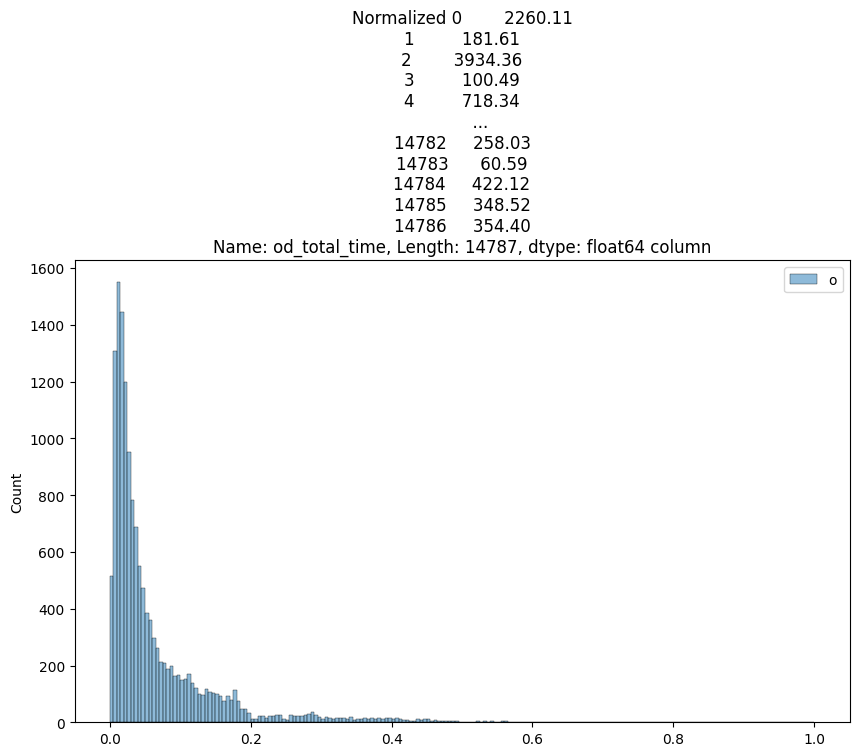

In [161]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

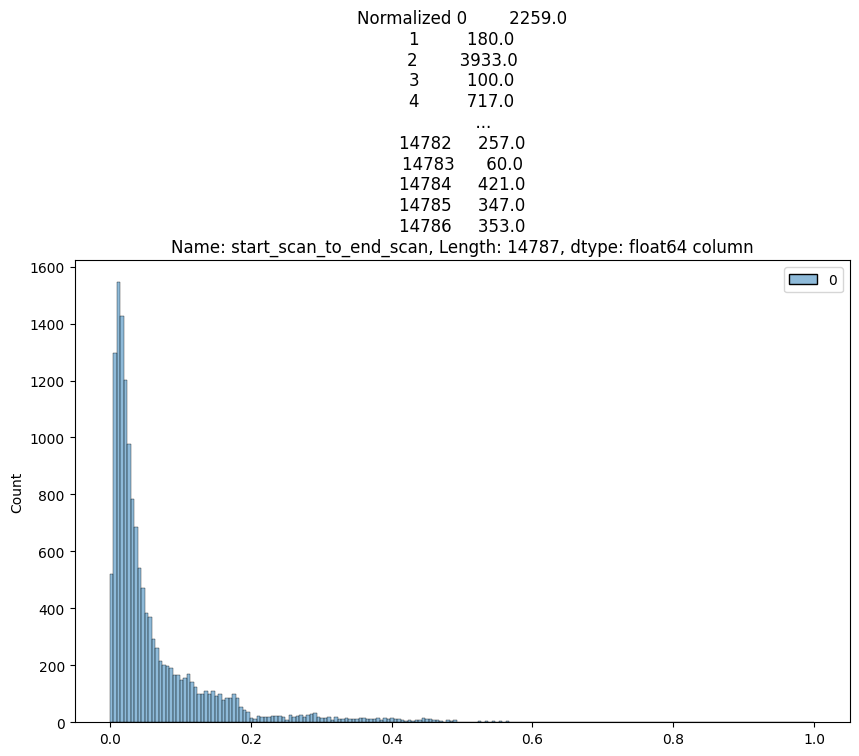

In [162]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

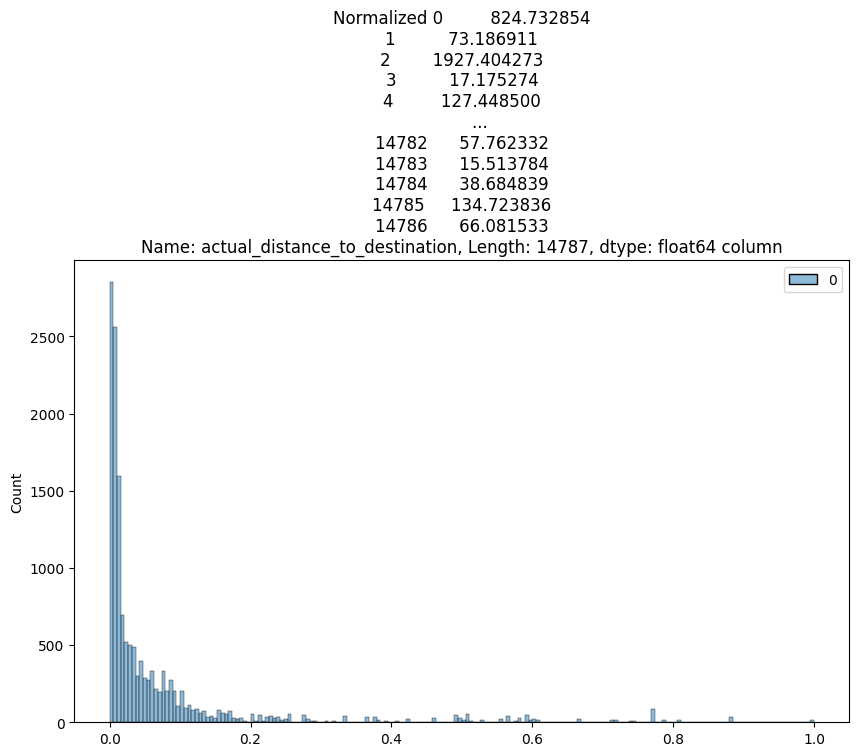

In [163]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_distance_to_destination']} column")
plt.plot()

[]

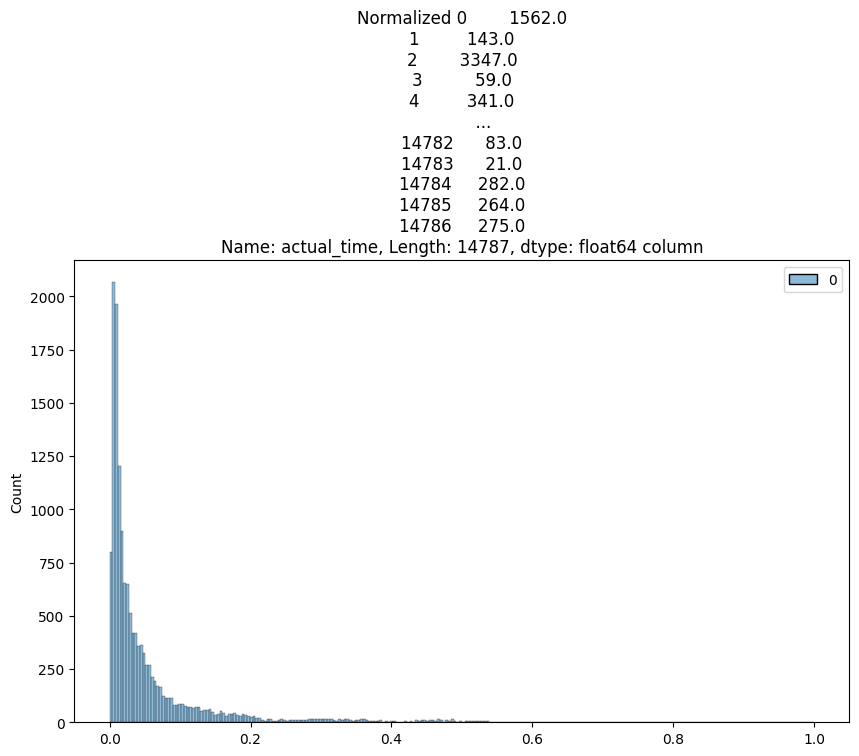

In [164]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['actual_time']} column")
plt.plot()

[]

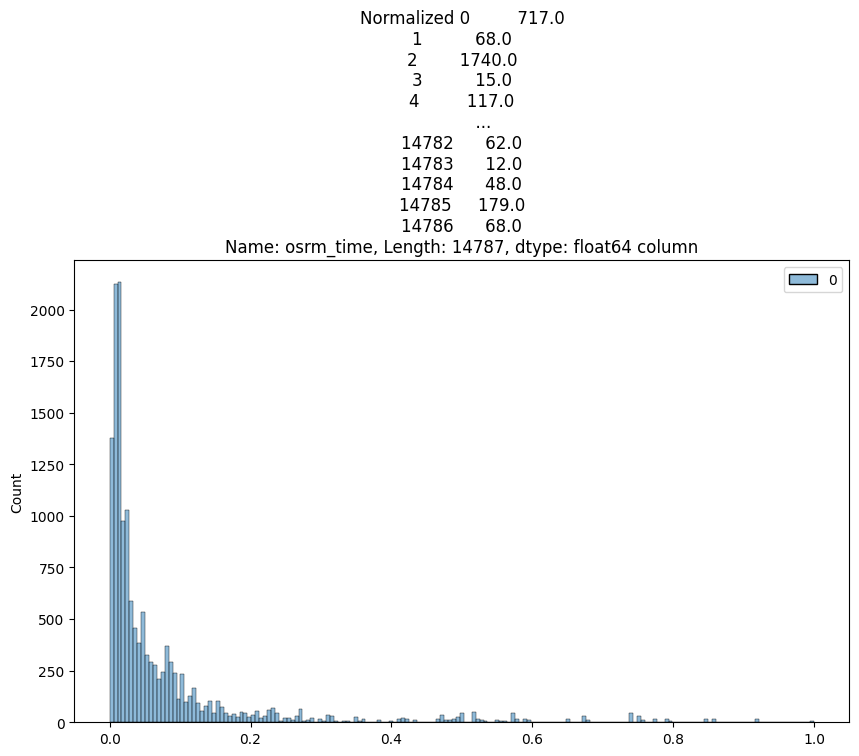

In [165]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_time']} column")
plt.plot()

[]

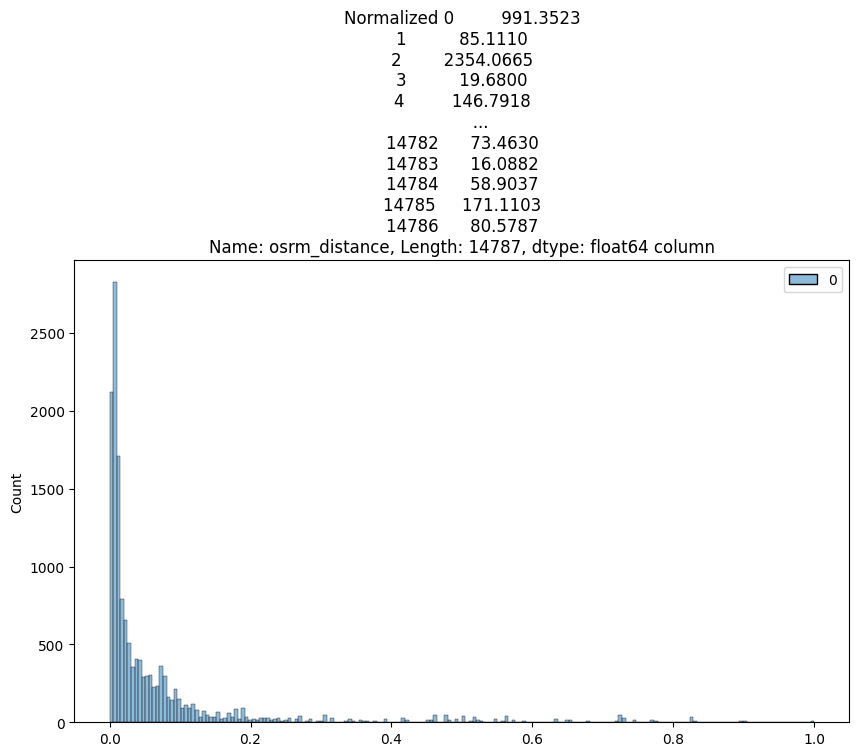

In [166]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_distance']} column")
plt.plot()

[]

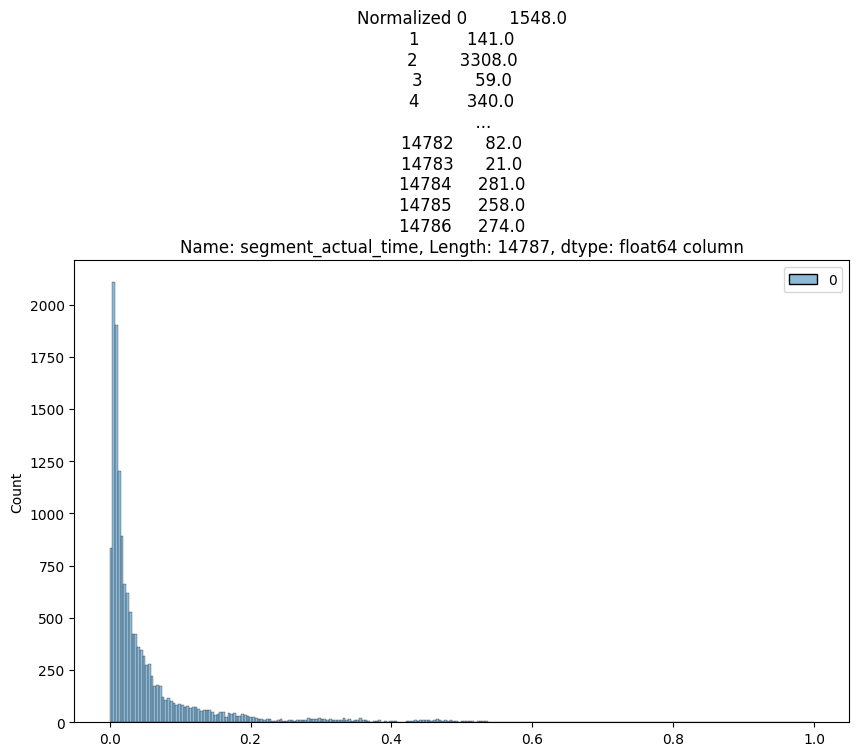

In [167]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_actual_time']} column")
plt.plot()

[]

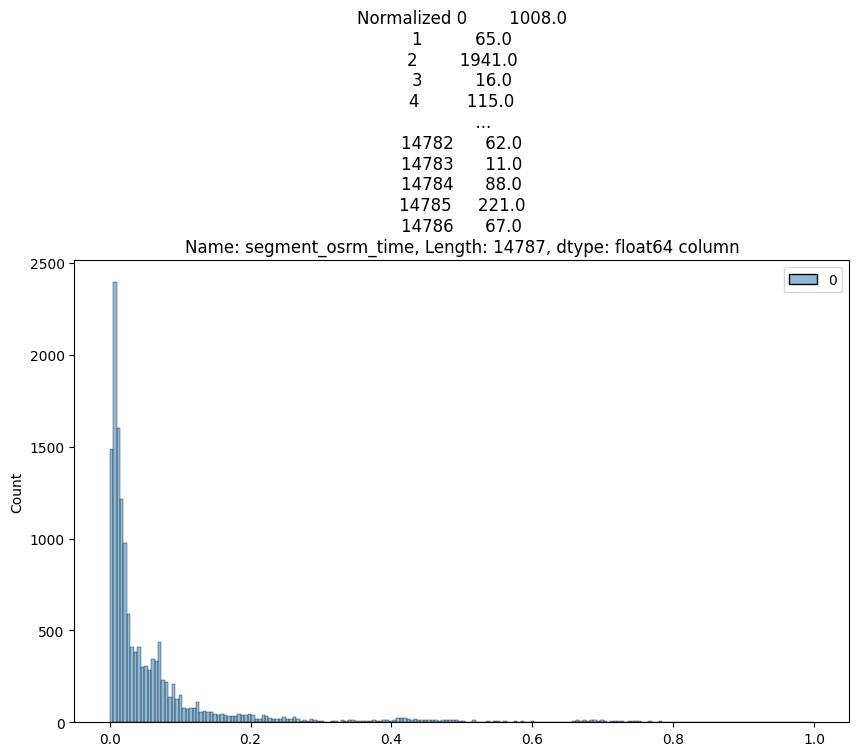

In [168]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_time']} column")
plt.plot()

[]

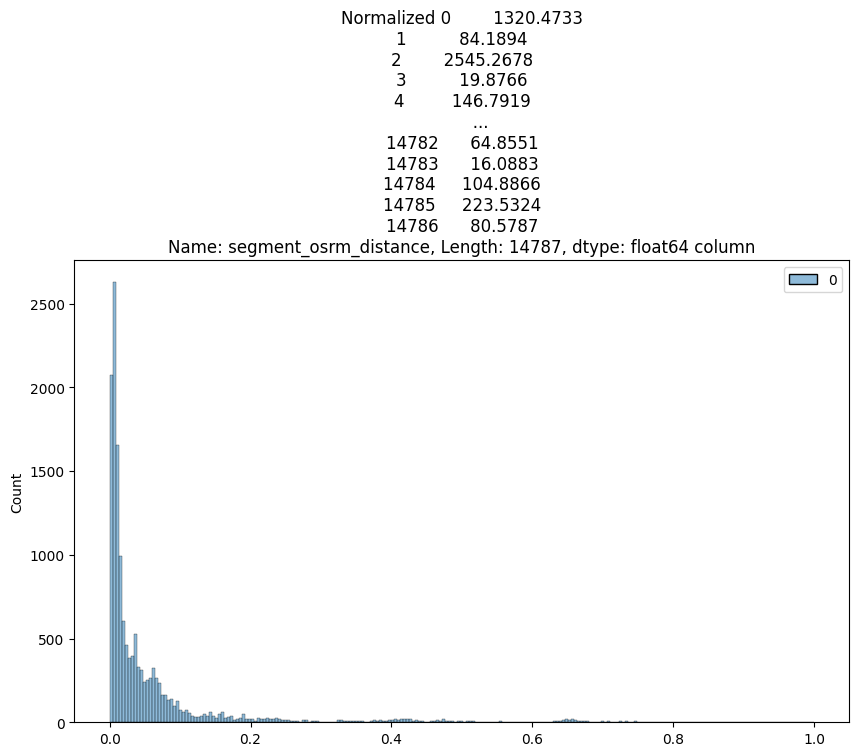

In [169]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_distance']} column")
plt.plot()

Standardization of numerical columns

In [170]:
from sklearn.preprocessing import StandardScaler

[]

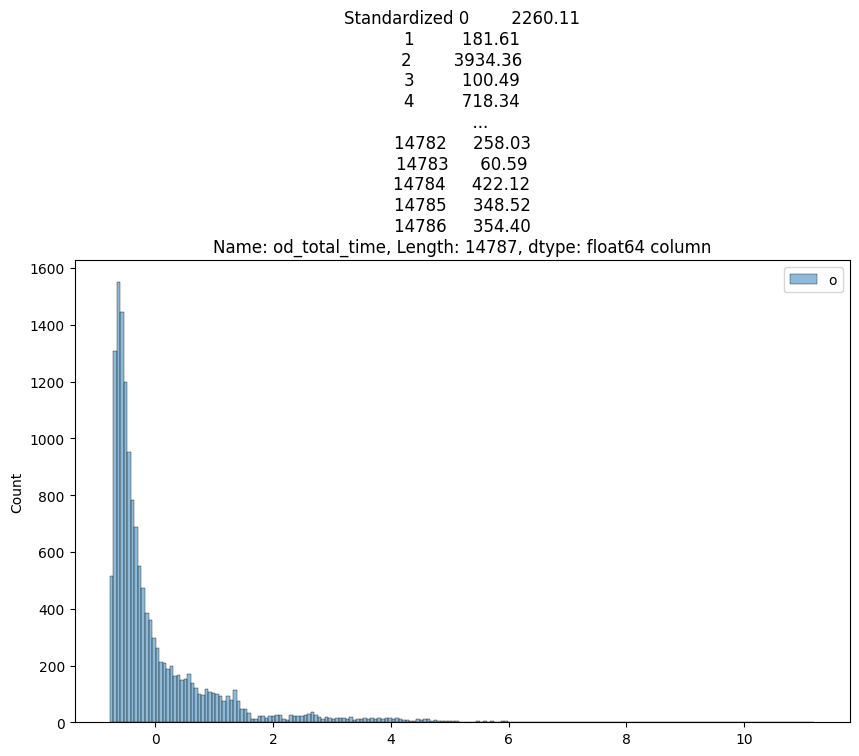

In [171]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

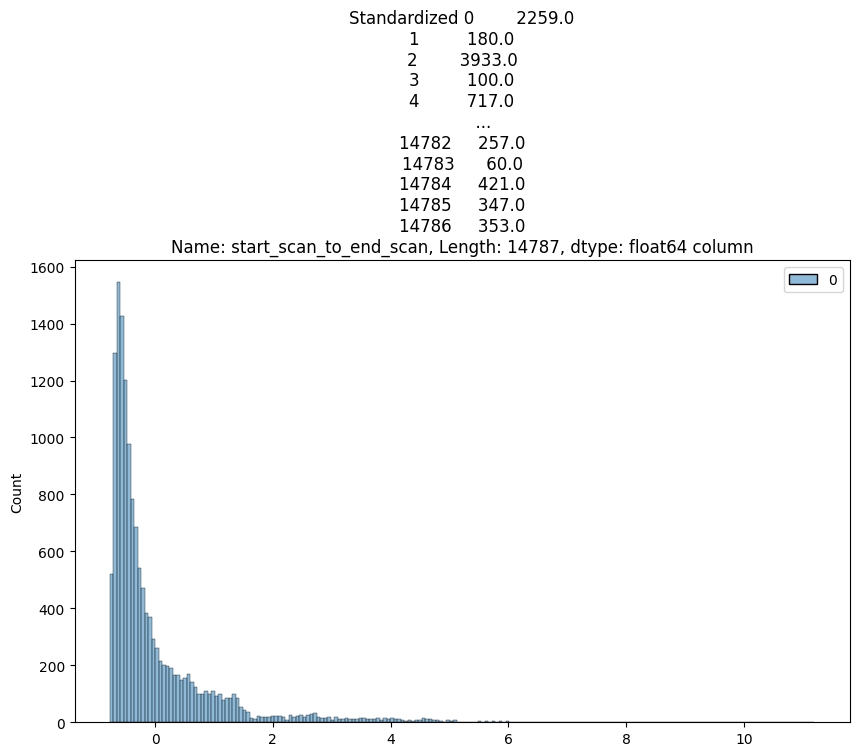

In [172]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

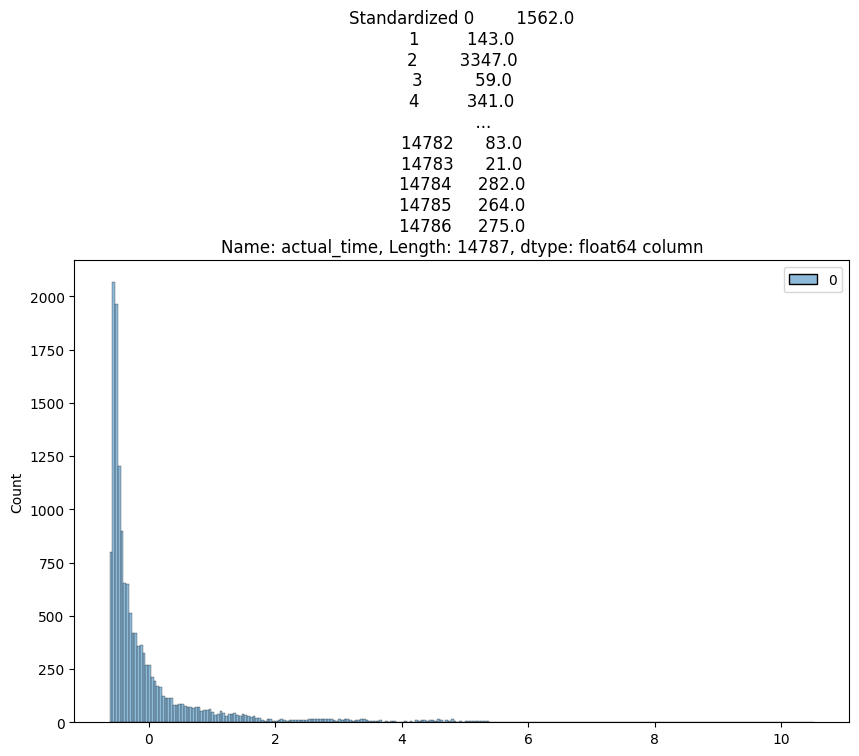

In [173]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_time']} column")
plt.plot()

[]

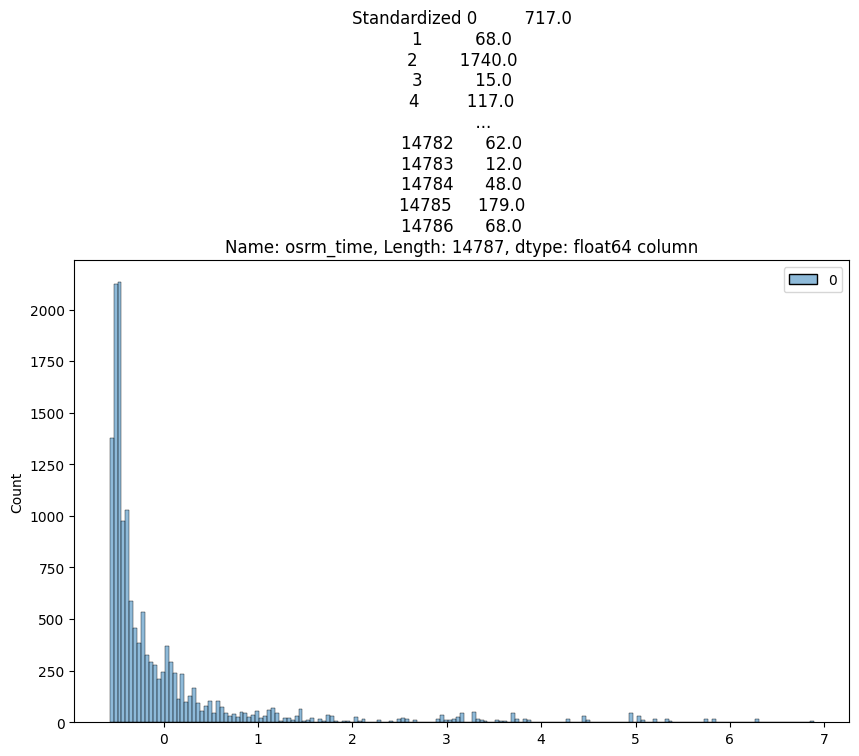

In [174]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_time']} column")
plt.plot()

[]

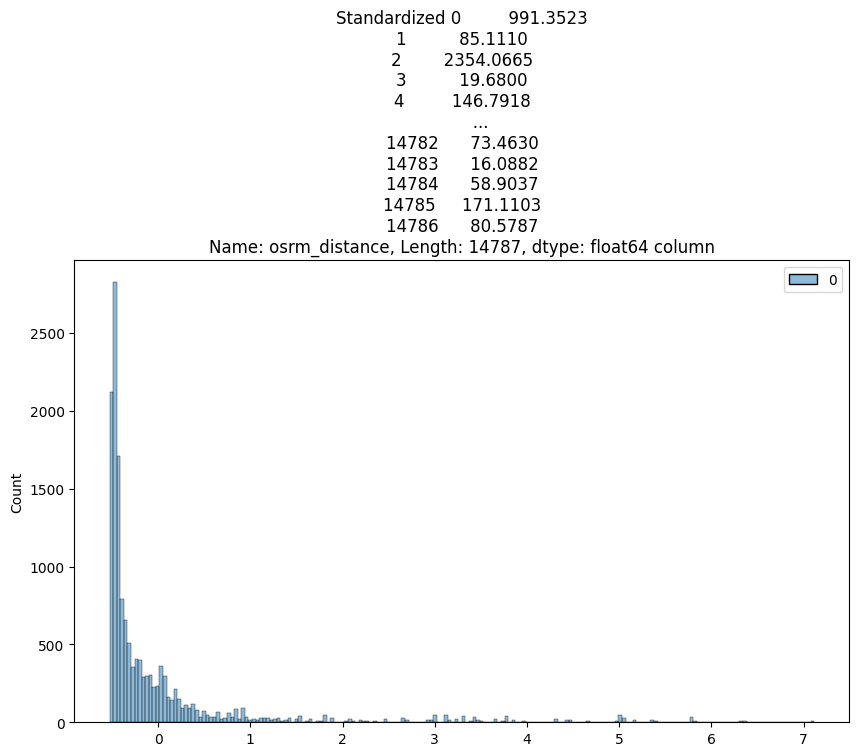

In [175]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_distance']} column")
plt.plot()

[]

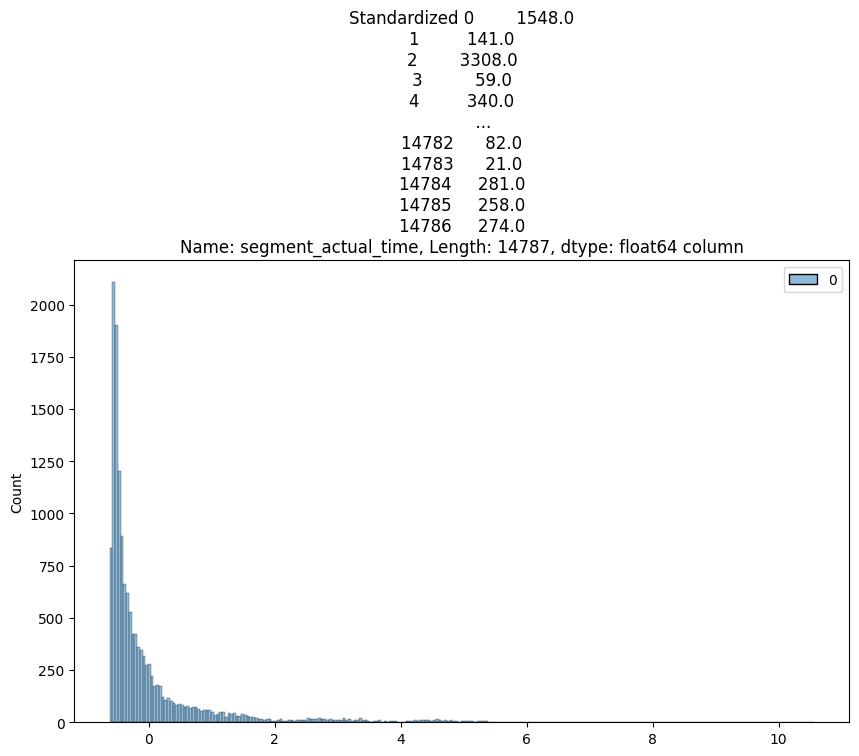

In [176]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_actual_time']} column")
plt.plot()

[]

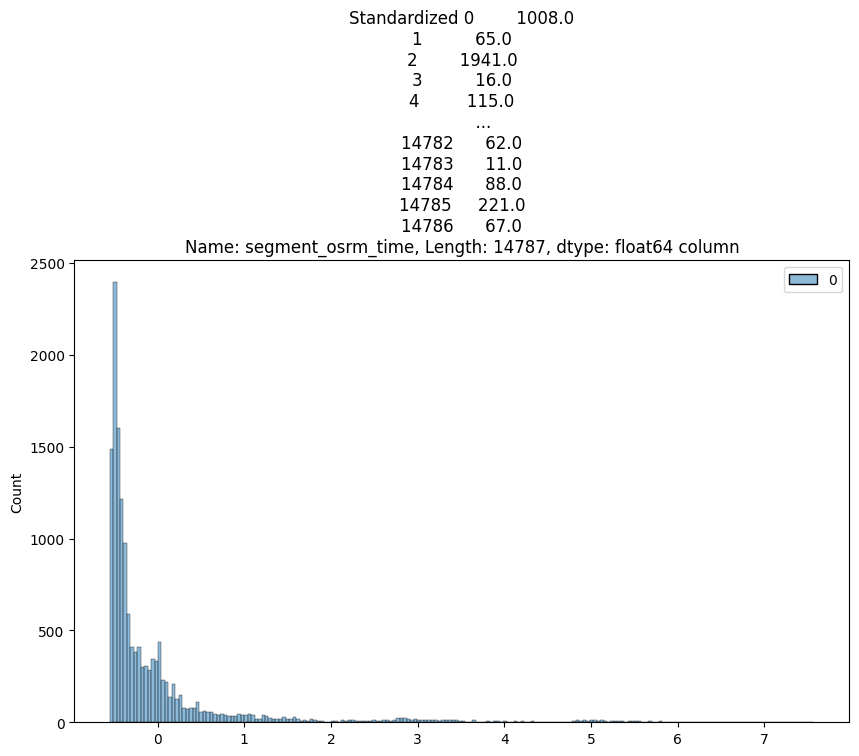

In [177]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_time']} column")
plt.plot()

[]

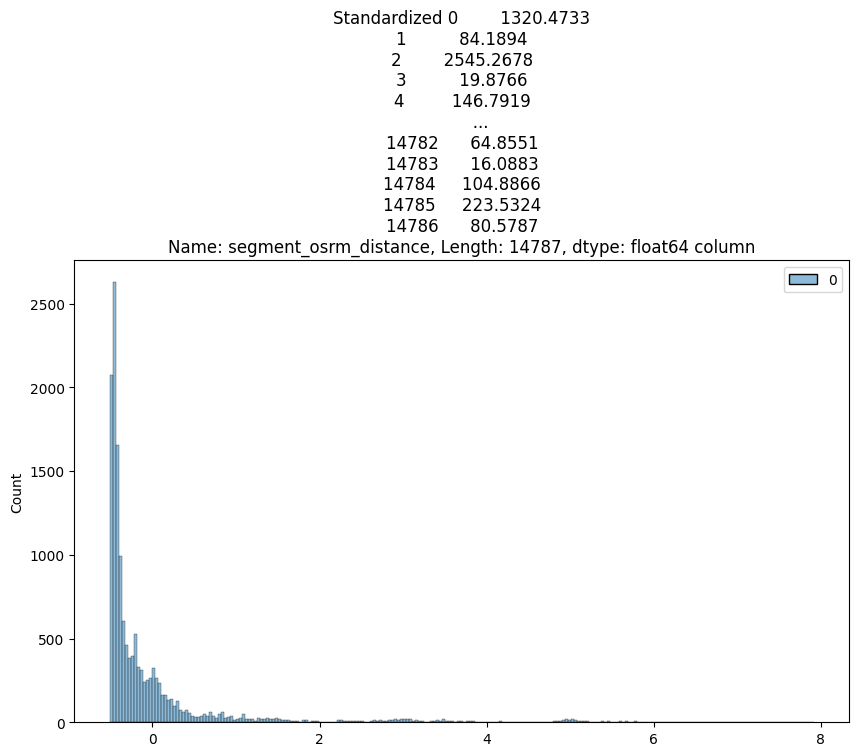

In [178]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_distance']} column")
plt.plot()

**Business Insights**


*   The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
*  There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.
*    Most of the data is for testing than for training.
*   Most common route type is Carting.
*   The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

*   Most orders come mid-month. That means customers usually make more orders in the mid of the month.
*    Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

*   Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.
*  Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.
*   Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.
*   Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.









**Recommendations**


*  The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.
*  osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

*   The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.
*   Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.


*  Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.


*   From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.



